In [1]:
import numpy as np
import cv2
import glob
import os
from skimage import io, data
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
import camera_calibration
import lane_detection
import vanishing_point
import utilities
import perspective_transform

In [3]:
ret, mtx, dist, rvecs, tvecs = camera_calibration.calibrate()

array([[[216, 214, 217],
        [218, 216, 219],
        [183, 181, 184],
        ...,
        [ 78, 124, 140],
        [ 94, 141, 157],
        [110, 159, 174]],

       [[216, 214, 217],
        [169, 167, 170],
        [140, 138, 141],
        ...,
        [110, 146, 158],
        [ 94, 132, 143],
        [ 81, 121, 131]],

       [[184, 182, 185],
        [139, 137, 140],
        [145, 143, 146],
        ...,
        [135, 153, 153],
        [129, 149, 148],
        [119, 141, 139]],

       ...,

       [[ 27,  28,  32],
        [ 94,  95,  99],
        [124, 125, 129],
        ...,
        [111, 111, 111],
        [111, 111, 111],
        [114, 114, 114]],

       [[ 34,  35,  39],
        [ 65,  66,  70],
        [115, 116, 120],
        ...,
        [108, 108, 108],
        [113, 113, 113],
        [108, 108, 108]],

       [[ 38,  39,  43],
        [ 22,  23,  27],
        [ 82,  83,  87],
        ...,
        [112, 112, 112],
        [105, 105, 105],
        [ 64,  64,  64]]

'RGB'

'RGB'

array([[[212, 207, 201],
        [194, 189, 185],
        [ 39,  35,  36],
        ...,
        [ 98,  96,  99],
        [183, 181, 184],
        [207, 205, 208]],

       [[192, 187, 183],
        [ 76,  71,  68],
        [ 26,  22,  23],
        ...,
        [148, 146, 149],
        [134, 132, 135],
        [153, 151, 154]],

       [[ 37,  32,  29],
        [ 93,  87,  87],
        [ 82,  77,  81],
        ...,
        [142, 140, 141],
        [134, 132, 133],
        [121, 119, 120]],

       ...,

       [[ 29,  30,  35],
        [ 86,  87,  92],
        [116, 117, 122],
        ...,
        [131, 131, 131],
        [132, 132, 132],
        [137, 137, 137]],

       [[ 32,  33,  38],
        [ 59,  60,  65],
        [105, 106, 111],
        ...,
        [134, 134, 134],
        [140, 140, 140],
        [129, 129, 129]],

       [[ 39,  40,  45],
        [ 22,  23,  28],
        [ 74,  75,  80],
        ...,
        [137, 137, 137],
        [127, 127, 127],
        [ 81,  81,  81]]

'RGB'

'RGB'

array([[[209, 204, 200],
        [196, 191, 187],
        [ 38,  34,  33],
        ...,
        [ 98,  98,  98],
        [178, 180, 179],
        [204, 206, 205]],

       [[192, 187, 184],
        [ 76,  71,  68],
        [ 30,  26,  25],
        ...,
        [140, 140, 140],
        [130, 132, 131],
        [151, 153, 152]],

       [[ 38,  34,  33],
        [ 83,  79,  78],
        [130, 126, 127],
        ...,
        [126, 126, 126],
        [124, 124, 124],
        [118, 118, 118]],

       ...,

       [[ 25,  26,  30],
        [101, 102, 106],
        [138, 139, 141],
        ...,
        [115, 115, 115],
        [118, 118, 118],
        [124, 124, 124]],

       [[ 31,  32,  37],
        [ 71,  72,  76],
        [131, 132, 134],
        ...,
        [115, 115, 115],
        [121, 121, 121],
        [117, 117, 117]],

       [[ 39,  40,  45],
        [ 25,  26,  30],
        [ 82,  83,  87],
        ...,
        [120, 120, 120],
        [114, 114, 114],
        [ 74,  74,  74]]

'RGB'

'RGB'

array([[[210, 207, 202],
        [191, 188, 183],
        [ 37,  33,  32],
        ...,
        [100,  99,  97],
        [176, 175, 173],
        [208, 207, 205]],

       [[193, 190, 185],
        [ 69,  65,  62],
        [ 33,  29,  28],
        ...,
        [142, 141, 139],
        [137, 136, 134],
        [155, 154, 152]],

       [[ 33,  29,  26],
        [ 91,  87,  84],
        [ 63,  59,  58],
        ...,
        [132, 131, 129],
        [131, 130, 128],
        [117, 116, 114]],

       ...,

       [[ 28,  31,  36],
        [130, 133, 138],
        [182, 185, 192],
        ...,
        [123, 123, 123],
        [117, 117, 117],
        [119, 119, 119]],

       [[ 33,  36,  41],
        [ 82,  85,  90],
        [188, 191, 196],
        ...,
        [115, 115, 115],
        [121, 121, 121],
        [120, 120, 120]],

       [[ 34,  37,  42],
        [ 24,  27,  32],
        [108, 111, 116],
        ...,
        [126, 126, 126],
        [118, 118, 118],
        [ 73,  73,  73]]

'RGB'

'RGB'

array([[[209, 204, 201],
        [195, 190, 187],
        [ 37,  33,  32],
        ...,
        [ 96,  95, 100],
        [181, 180, 185],
        [207, 206, 211]],

       [[195, 190, 187],
        [ 73,  68,  65],
        [ 26,  22,  21],
        ...,
        [167, 166, 171],
        [145, 144, 149],
        [150, 149, 154]],

       [[ 33,  29,  28],
        [ 91,  87,  86],
        [ 85,  81,  80],
        ...,
        [168, 167, 172],
        [173, 172, 177],
        [138, 137, 142]],

       ...,

       [[ 27,  28,  32],
        [ 91,  92,  96],
        [122, 121, 126],
        ...,
        [127, 127, 127],
        [132, 132, 132],
        [133, 133, 133]],

       [[ 29,  33,  36],
        [ 63,  64,  68],
        [110, 110, 112],
        ...,
        [125, 125, 125],
        [132, 132, 132],
        [125, 125, 125]],

       [[ 36,  40,  43],
        [ 23,  27,  30],
        [ 76,  76,  78],
        ...,
        [133, 133, 133],
        [125, 125, 125],
        [ 82,  82,  82]]

'RGB'

'RGB'

array([[[209, 204, 200],
        [194, 189, 185],
        [ 37,  33,  30],
        ...,
        [182, 182, 184],
        [206, 206, 208],
        [175, 176, 178]],

       [[196, 191, 187],
        [ 74,  69,  65],
        [ 28,  24,  21],
        ...,
        [144, 144, 146],
        [153, 153, 155],
        [197, 198, 200]],

       [[ 33,  29,  26],
        [ 91,  87,  84],
        [ 84,  80,  77],
        ...,
        [168, 167, 172],
        [143, 142, 147],
        [152, 152, 154]],

       ...,

       [[ 32,  33,  37],
        [ 60,  61,  65],
        [106, 107, 111],
        ...,
        [133, 133, 133],
        [121, 121, 123],
        [ 62,  63,  68]],

       [[ 36,  39,  44],
        [ 22,  25,  30],
        [ 75,  78,  83],
        ...,
        [130, 130, 132],
        [ 82,  83,  87],
        [ 25,  28,  35]],

       [[ 42,  46,  57],
        [ 31,  35,  44],
        [ 23,  28,  34],
        ...,
        [ 64,  65,  69],
        [ 25,  28,  33],
        [ 32,  36,  45]]

'RGB'

'RGB'

array([[[210, 205, 201],
        [192, 187, 183],
        [ 38,  34,  33],
        ...,
        [ 96,  95, 101],
        [181, 180, 186],
        [205, 204, 210]],

       [[195, 190, 186],
        [ 75,  70,  66],
        [ 26,  22,  21],
        ...,
        [160, 159, 165],
        [135, 134, 140],
        [153, 152, 158]],

       [[ 33,  30,  25],
        [ 94,  91,  86],
        [ 84,  80,  79],
        ...,
        [148, 147, 153],
        [147, 146, 152],
        [127, 126, 132]],

       ...,

       [[ 27,  27,  35],
        [ 90,  90,  98],
        [118, 119, 124],
        ...,
        [125, 126, 120],
        [125, 126, 120],
        [132, 133, 127]],

       [[ 33,  33,  41],
        [ 58,  58,  66],
        [106, 107, 112],
        ...,
        [124, 125, 119],
        [131, 132, 126],
        [127, 128, 120]],

       [[ 38,  38,  46],
        [ 23,  23,  31],
        [ 79,  80,  85],
        ...,
        [131, 132, 126],
        [128, 129, 121],
        [ 77,  78,  70]]

'RGB'

'RGB'

array([[[192, 191, 187],
        [ 69,  68,  64],
        [ 29,  28,  24],
        ...,
        [147, 147, 147],
        [142, 142, 142],
        [146, 146, 146]],

       [[ 33,  32,  28],
        [ 88,  87,  83],
        [ 82,  81,  77],
        ...,
        [136, 136, 136],
        [128, 128, 128],
        [129, 129, 129]],

       [[156, 155, 153],
        [127, 126, 124],
        [131, 130, 128],
        ...,
        [140, 140, 138],
        [136, 136, 134],
        [136, 136, 134]],

       ...,

       [[ 30,  35,  38],
        [ 60,  65,  68],
        [119, 120, 124],
        ...,
        [132, 130, 131],
        [137, 135, 136],
        [134, 132, 133]],

       [[ 35,  40,  43],
        [ 23,  28,  31],
        [ 74,  75,  79],
        ...,
        [139, 137, 138],
        [130, 128, 129],
        [ 86,  84,  85]],

       [[ 42,  47,  50],
        [ 32,  37,  40],
        [ 28,  29,  33],
        ...,
        [100,  98,  99],
        [ 68,  66,  67],
        [ 27,  25,  26]]

'RGB'

'RGB'

array([[[ 84,  84,  86],
        [ 34,  34,  36],
        [123, 123, 125],
        ...,
        [146, 146, 146],
        [148, 148, 148],
        [155, 155, 155]],

       [[120, 120, 122],
        [ 35,  35,  37],
        [137, 137, 139],
        ...,
        [142, 142, 142],
        [143, 143, 143],
        [148, 148, 148]],

       [[151, 151, 153],
        [133, 133, 135],
        [127, 127, 129],
        ...,
        [139, 139, 139],
        [139, 139, 139],
        [143, 143, 143]],

       ...,

       [[ 28,  33,  36],
        [ 60,  65,  68],
        [121, 122, 126],
        ...,
        [136, 134, 137],
        [136, 134, 137],
        [133, 131, 134]],

       [[ 32,  37,  40],
        [ 22,  27,  30],
        [ 75,  76,  80],
        ...,
        [141, 139, 142],
        [129, 127, 130],
        [ 81,  79,  82]],

       [[ 44,  49,  52],
        [ 33,  38,  41],
        [ 26,  27,  31],
        ...,
        [ 99,  97, 100],
        [ 69,  67,  70],
        [ 29,  27,  30]]

'RGB'

'RGB'

array([[[198, 189, 184],
        [ 45,  37,  34],
        [177, 173, 170],
        ...,
        [153, 153, 153],
        [179, 179, 179],
        [155, 155, 155]],

       [[ 93,  83,  81],
        [ 38,  30,  27],
        [127, 123, 122],
        ...,
        [142, 142, 142],
        [149, 149, 149],
        [152, 152, 152]],

       [[124, 116, 114],
        [ 37,  32,  29],
        [139, 137, 138],
        ...,
        [133, 133, 133],
        [131, 131, 131],
        [146, 146, 146]],

       ...,

       [[ 27,  28,  33],
        [ 92,  93,  98],
        [117, 118, 123],
        ...,
        [131, 131, 129],
        [132, 132, 130],
        [134, 134, 132]],

       [[ 32,  32,  40],
        [ 63,  63,  71],
        [111, 112, 117],
        ...,
        [133, 133, 131],
        [141, 141, 139],
        [129, 129, 127]],

       [[ 39,  39,  47],
        [ 22,  22,  30],
        [ 79,  80,  85],
        ...,
        [136, 136, 134],
        [129, 129, 127],
        [ 82,  82,  80]]

'RGB'

'RGB'

array([[[237, 233, 234],
        [192, 188, 189],
        [149, 145, 144],
        ...,
        [200, 206, 202],
        [158, 164, 164],
        [106, 115, 114]],

       [[206, 202, 203],
        [148, 144, 145],
        [203, 199, 198],
        ...,
        [247, 252, 248],
        [236, 242, 240],
        [178, 184, 182]],

       [[178, 174, 173],
        [183, 179, 178],
        [241, 237, 236],
        ...,
        [246, 249, 242],
        [248, 250, 245],
        [244, 249, 243]],

       ...,

       [[ 25,  22,  17],
        [ 86,  83,  78],
        [204, 201, 194],
        ...,
        [165, 166, 148],
        [166, 167, 149],
        [172, 173, 155]],

       [[ 23,  22,  18],
        [ 15,  14,   9],
        [112, 109, 102],
        ...,
        [171, 172, 156],
        [165, 166, 148],
        [101, 102,  84]],

       [[ 28,  27,  23],
        [ 22,  21,  16],
        [ 21,  18,  11],
        ...,
        [120, 121, 105],
        [ 81,  82,  64],
        [ 30,  31,  13]]

'RGB'

'RGB'

array([[[ 84,  83,  88],
        [ 37,  36,  41],
        [121, 120, 125],
        ...,
        [142, 140, 141],
        [146, 144, 145],
        [157, 155, 156]],

       [[116, 115, 120],
        [ 34,  33,  38],
        [133, 132, 137],
        ...,
        [138, 136, 137],
        [139, 137, 138],
        [148, 146, 147]],

       [[151, 150, 155],
        [132, 131, 136],
        [121, 120, 125],
        ...,
        [135, 133, 134],
        [135, 133, 134],
        [139, 137, 138]],

       ...,

       [[ 29,  32,  41],
        [ 60,  63,  72],
        [115, 118, 125],
        ...,
        [129, 127, 128],
        [136, 134, 135],
        [132, 130, 131]],

       [[ 37,  41,  50],
        [ 24,  28,  37],
        [ 73,  76,  83],
        ...,
        [138, 138, 138],
        [130, 130, 130],
        [ 86,  86,  86]],

       [[ 41,  45,  54],
        [ 29,  33,  42],
        [ 27,  30,  37],
        ...,
        [ 97,  97,  97],
        [ 64,  64,  64],
        [ 28,  28,  28]]

'RGB'

'RGB'

array([[[234, 233, 231],
        [191, 190, 186],
        [147, 146, 142],
        ...,
        [167, 182, 175],
        [132, 148, 145],
        [ 97, 116, 112]],

       [[200, 199, 197],
        [149, 148, 144],
        [191, 190, 185],
        ...,
        [196, 209, 202],
        [191, 206, 201],
        [152, 169, 163]],

       [[175, 174, 170],
        [176, 175, 171],
        [226, 225, 220],
        ...,
        [197, 204, 196],
        [201, 211, 203],
        [193, 204, 198]],

       ...,

       [[ 22,  22,  22],
        [ 82,  82,  82],
        [182, 182, 182],
        ...,
        [183, 183, 173],
        [183, 183, 173],
        [178, 178, 166]],

       [[ 23,  23,  23],
        [ 16,  16,  16],
        [102, 102, 102],
        ...,
        [189, 189, 179],
        [177, 177, 167],
        [106, 106,  96]],

       [[ 25,  25,  25],
        [ 22,  22,  22],
        [ 20,  20,  20],
        ...,
        [134, 134, 126],
        [ 85,  85,  75],
        [ 29,  29,  19]]

'RGB'

'RGB'

array([[[212, 210, 211],
        [217, 215, 216],
        [184, 182, 183],
        ...,
        [ 78, 125, 145],
        [ 91, 141, 164],
        [107, 159, 181]],

       [[217, 215, 216],
        [171, 169, 170],
        [137, 135, 136],
        ...,
        [106, 143, 159],
        [ 91, 133, 149],
        [ 76, 119, 136]],

       [[186, 184, 187],
        [139, 137, 140],
        [147, 145, 148],
        ...,
        [126, 145, 151],
        [121, 141, 148],
        [109, 132, 138]],

       ...,

       [[ 28,  29,  34],
        [ 92,  93,  98],
        [124, 125, 129],
        ...,
        [112, 112, 112],
        [113, 113, 113],
        [119, 119, 119]],

       [[ 32,  33,  38],
        [ 61,  62,  67],
        [113, 114, 118],
        ...,
        [109, 109, 109],
        [117, 117, 117],
        [112, 112, 112]],

       [[ 38,  39,  44],
        [ 27,  28,  33],
        [ 79,  80,  84],
        ...,
        [117, 117, 117],
        [110, 110, 110],
        [ 66,  66,  66]]

'RGB'

'RGB'

array([[[213, 213, 213],
        [217, 217, 217],
        [183, 183, 185],
        ...,
        [ 92, 142, 165],
        [100, 161, 189],
        [112, 188, 224]],

       [[213, 213, 213],
        [171, 171, 171],
        [142, 142, 144],
        ...,
        [ 86, 127, 145],
        [ 71, 121, 144],
        [ 86, 155, 186]],

       [[182, 182, 184],
        [135, 135, 137],
        [144, 144, 146],
        ...,
        [114, 134, 143],
        [ 99, 131, 144],
        [ 71, 121, 144]],

       ...,

       [[ 34,  35,  40],
        [ 59,  60,  65],
        [ 98,  99, 104],
        ...,
        [119, 119, 121],
        [117, 117, 119],
        [ 53,  53,  53]],

       [[ 36,  39,  46],
        [ 23,  26,  33],
        [ 66,  69,  74],
        ...,
        [114, 114, 116],
        [ 66,  66,  68],
        [ 16,  16,  16]],

       [[ 39,  46,  54],
        [ 30,  37,  45],
        [ 23,  28,  34],
        ...,
        [ 51,  51,  53],
        [ 16,  16,  18],
        [ 21,  21,  21]]

'RGB'

'RGB'

array([[[212, 213, 215],
        [216, 217, 219],
        [182, 183, 185],
        ...,
        [ 79, 124, 145],
        [ 88, 136, 159],
        [110, 162, 184]],

       [[214, 215, 217],
        [166, 167, 169],
        [138, 139, 141],
        ...,
        [113, 149, 165],
        [ 91, 132, 150],
        [ 79, 122, 139]],

       [[183, 184, 186],
        [138, 139, 141],
        [144, 144, 146],
        ...,
        [130, 149, 155],
        [126, 149, 157],
        [112, 139, 146]],

       ...,

       [[ 29,  29,  37],
        [ 96,  97, 102],
        [128, 129, 134],
        ...,
        [101,  99, 100],
        [104, 102, 103],
        [109, 107, 108]],

       [[ 30,  30,  38],
        [ 66,  67,  72],
        [124, 125, 130],
        ...,
        [104, 102, 103],
        [109, 107, 108],
        [100,  98,  99]],

       [[ 37,  37,  45],
        [ 26,  27,  32],
        [ 83,  84,  89],
        ...,
        [110, 108, 109],
        [102, 100, 101],
        [ 63,  61,  62]]

'RGB'

'RGB'

array([[[210, 208, 211],
        [217, 215, 218],
        [182, 180, 183],
        ...,
        [ 77, 123, 146],
        [ 90, 140, 163],
        [109, 161, 185]],

       [[217, 215, 218],
        [175, 173, 176],
        [140, 138, 141],
        ...,
        [ 75, 112, 130],
        [ 72, 113, 131],
        [ 76, 119, 136]],

       [[183, 181, 184],
        [138, 136, 139],
        [143, 141, 144],
        ...,
        [ 74,  93,  99],
        [ 78,  98, 105],
        [ 84, 107, 113]],

       ...,

       [[ 26,  27,  32],
        [ 94,  95, 100],
        [129, 130, 135],
        ...,
        [102, 100, 101],
        [102, 100, 101],
        [108, 106, 107]],

       [[ 34,  35,  40],
        [ 66,  67,  72],
        [120, 121, 126],
        ...,
        [102, 100, 101],
        [109, 107, 108],
        [102, 100, 101]],

       [[ 37,  38,  43],
        [ 25,  26,  31],
        [ 80,  81,  86],
        ...,
        [107, 105, 106],
        [101,  99, 100],
        [ 61,  59,  60]]

'RGB'

'RGB'

In [4]:
def get_distance(img_name, query_pnt):
    
    img_BGR = cv2.imread(img_name)
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    
    ud_img_BGR = cv2.undistort(img_BGR, mtx, dist, None, mtx)
    ud_img_RGB = cv2.cvtColor(ud_img_BGR, cv2.COLOR_BGR2RGB)
    # original image
    utilities.show_images([ud_img_RGB])
    
    detector = lane_detection.LaneDetector()
    lines = detector.process(ud_img_RGB, True)
    
    vp = vanishing_point.calculate_vanishing_point(lines, ud_img_BGR)
    
    H, H_inv, warped = perspective_transform.perspective_transform(vp, ud_img_BGR)
    
    
    x_pixels_per_meter , y_pixels_per_meter, left_low, left_high, right_low, right_high = \
                    perspective_transform.get_ratio(H, H_inv, warped, img_BGR.shape[0], img_BGR.shape[1], mtx)
    
    center = [img_BGR.shape[1]//2, img_BGR.shape[0]-1]
    distance = perspective_transform.get_distance(query_pnt, center, H, x_pixels_per_meter, y_pixels_per_meter)

    # image with lanes
    ud_img_BGR_with_lanes = np.array(ud_img_BGR)
    cv2.line(ud_img_BGR_with_lanes,(left_low[0], left_low[1]),(left_high[0], left_high[1]),(0,0,255),2)
    cv2.line(ud_img_BGR_with_lanes,(right_low[0], right_low[1]),(right_high[0], right_high[1]),(0,0,255),2)

    # distance
    return distance, ud_img_BGR_with_lanes

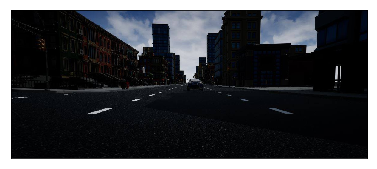

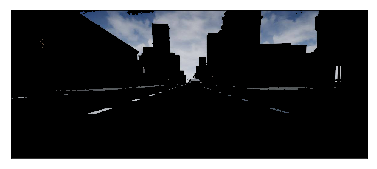

[[611]
 [260]]


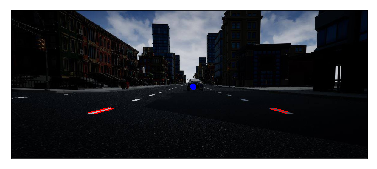

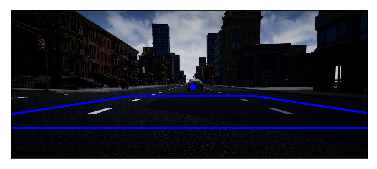

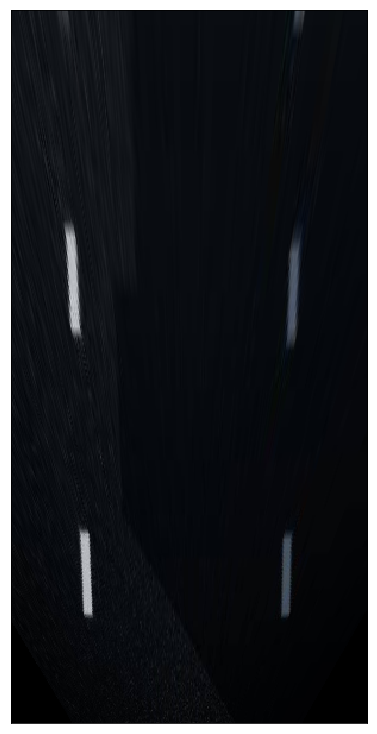

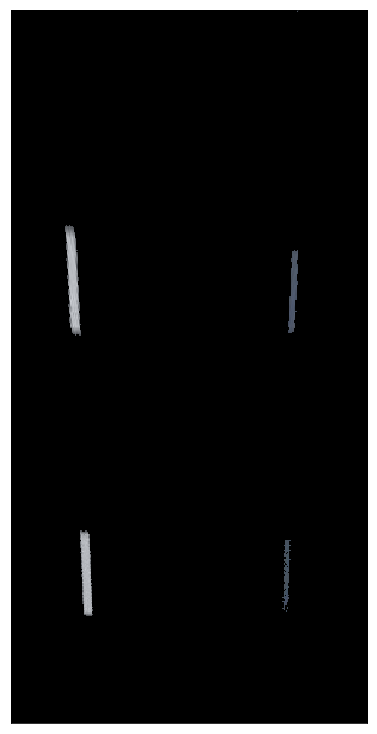

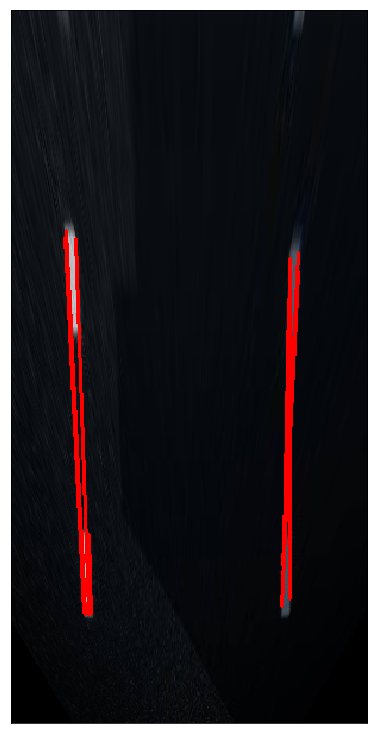

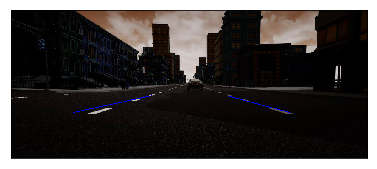

4.939695196176149


In [6]:
img_name = 'x13.jpg'
query_pnt = [80, 80]
distance, ud_img_BGR_with_lanes = get_distance(img_name, query_pnt)

utilities.show_images([ud_img_BGR_with_lanes])
print(distance)